Analysis of Variance (ANOVA) is a statistical method for determining the existence of differences among several population means. 


The Hypothesis Test of Analysis of Variance: Assumptions

+  We assume independent random sampling from each of the r populations

+ We assume that the r populations under study: 

    + are normally distributed, 

    + with means $\mu_i$ that may or may not be equal, 

    + but with equal variances



$$H_0: \mu_{1} = \mu_{2} = \mu_{3} = ... = \mu_r$$
$$H_1: Not\ all\ \mu_i\ (i = 1, 2, ..., r)\ are\ equal$$

Exercise 1: Below are data of the responses of a disease subjected to three different treatments. Test if the three treatments are significantly different or not. 

|Treatment 1|Treatment 2|Treatment 3|
|--|--|--|
|7|11|8|
|12|17|6|
|9|16|10|
|11|13|9|
|8|10|11|
|9|15|7|
|11|14|10|
|10|18|-|
|7|-|-|
|8|-|-|

Before conducting the ANOVA test, we have to test whether:

+ The data is normally distributed or not

+ All population variance equal or not

VARIANCE TEST (F TEST)
$$H_0: \sigma^2_{max} = \sigma^2_{min}$$
$$H_1: \sigma^2_{max} \not= \sigma^2_{min}$$

In [6]:
# Create lists values of each treatment
Treatment_1 = [7,  12,  9,  11,  8,  9, 11, 10, 7, 8 ]
Treatment_2 = [11,  17,  16,  13,  10,  15, 14, 18 ]
Treatment_3 = [8,  6,  10,  9,  11,  7, 10 ]


In [27]:
import statistics

Variance_1 = statistics.variance(Treatment_1)
print("Variace of Treatment 1 =", Variance_1)
n_1 = len(Treatment_1)
print("n_1 =", n_1)


Variance_2 = statistics.variance(Treatment_2)
print("Variace of Treatment 2 =", Variance_2)
n_2 = len(Treatment_2)
print("n_2 =", n_2)


Variance_3 = statistics.variance(Treatment_3)
print("Variace of Treatment 3 =", Variance_3)
n_3 = len(Treatment_3)
print("n_3 =", n_3)

Variace of Treatment 1 = 3.066666666666667
n_1 = 10
Variace of Treatment 2 = 7.928571428571429
n_2 = 8
Variace of Treatment 3 = 3.238095238095238
n_3 = 7


In [28]:
# Find Variace maximum 
Var_Max = max([Variance_1, Variance_2, Variance_3])
print("Maximum variance =", Var_Max)

# Find Variace minimum
Var_Min = min([Variance_1, Variance_2, Variance_3])
print("Manimum variance =", Var_Min)

Maximum variance = 7.928571428571429
Manimum variance = 3.066666666666667


$$F_{score} = \frac{S^2_{max}}{S^2_{min}}$$

In [36]:
F_score = Var_Max/Var_Min
print("F_score =", F_score)

# Compute critical value
alpha = 0.05

from scipy.stats import f
F_crit_1 = f.ppf(alpha/2, n_2 -1, n_1 - 1)
print("Critical value 1 =", F_crit_1)

F_crit_2 = f.ppf(1 - alpha/2, n_2 -1, n_1 - 1)
print("Critical value 2 =", F_crit_2)

F_score = 2.5854037267080745
Critical value 1 = 0.2073304979757461
Critical value 2 = 4.197046636945515


In [40]:
# Decision Making
if F_crit_1 <= F_score <= F_crit_2:
    print("Do not reject Ho")
    print("Conclusion: All the population variances are equal")
else:
    print("Reject Ho")
    print("Conclusion: All the population variances are NOT equal")

Do not reject Ho
Conclusion: All the population variances are equal


NORMALITY TEST
$$H_o: The \ data \ follow \ normal \ distribution$$
$$H_1: The \ data \ does \ not \ follow \ normal \ distribution$$


In [64]:
import numpy as np  
Data = np.array([7, 12, 9, 11, 8 ,9, 11, 10, 7,8 ,11, 17, 16, 13, 10, 15, 14, 18, 8, 6, 10, 9, 11,7, 10])

# Find the average and standard deviation of the data
x_bar = Data.mean()
print("x_bar =", x_bar)
s = Data.std(ddof=1)
print("Sample standard deviation s =", s)


x_bar = 10.68
Sample standard deviation s = 3.249615361854384


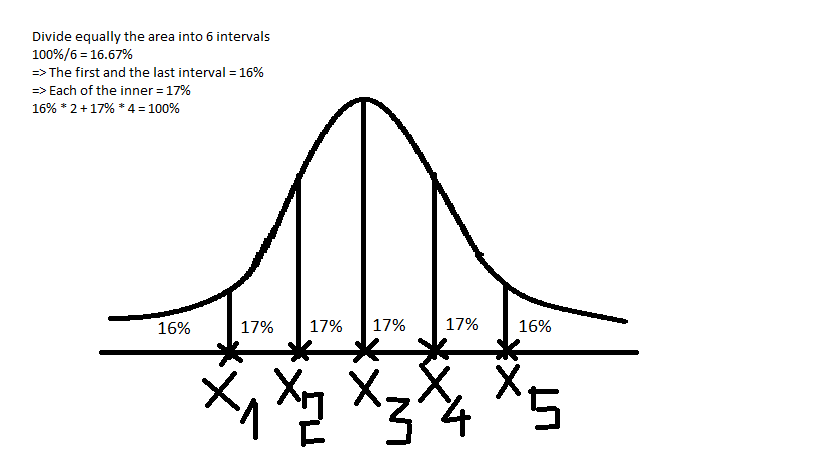

In [65]:
from IPython.display import Image
Image(filename='normalitytest.png') 

In [76]:
from scipy.stats import norm
# Compute X1, X2, X3, X4, X5 
X1 = norm.ppf(0.16, loc = x_bar, scale = s)
print("X1 =", X1)

X2 = norm.ppf(0.16 + 0.17, loc = x_bar, scale = s)
print("X2 =", X2)

X3 = norm.ppf(0.16 + 0.17*2, loc = x_bar, scale = s)
print("X3 =", X3)

X4 = norm.ppf(0.16 + 0.17*3, loc = x_bar, scale = s)
print("X4 =", X4)

X5 = norm.ppf(0.16 + 0.17*4, loc = x_bar, scale = s)
print("X5 =", X5)

X1 = 7.448394386004393
X2 = 9.250451418946266
X3 = 10.68
X4 = 12.109548581053733
X5 = 13.911605613995608


In [98]:
# Create a function to count how many observed value in each interval
def Observation(start, end, ListOfData):
    ListOfi = []
    for i in ListOfData:
        if i >= start and i <= end:
            ListOfi.append(i)
            Observed = len(ListOfi)
    print("There are {Observed} observed values from larger than {start} to smaller or equal {end}".format(Observed=Observed,start=start, end = end))


In [101]:
Observation(0, X1, Data)
Observation(X1, X2, Data)
Observation(X2, X3, Data)
Observation(X3, X4, Data)
Observation(X4, X5, Data)
Observation(X5, float("inf"), Data)

There are 4 observed values from larger than 0 to smaller or equal 7.448394386004393
There are 6 observed values from larger than 7.448394386004393 to smaller or equal 9.250451418946266
There are 4 observed values from larger than 9.250451418946266 to smaller or equal 10.68
There are 5 observed values from larger than 10.68 to smaller or equal 12.109548581053733
There are 1 observed values from larger than 12.109548581053733 to smaller or equal 13.911605613995608
There are 5 observed values from larger than 13.911605613995608 to smaller or equal inf


In [103]:
n = len(Data)
print("Sample size n =", n)

# Compute the expected value
Expcted_1 = n*0.16
print("Expected value 1 =", Expcted_1)

Expcted_2 = n*0.17
print("Expected value 2 =", Expcted_2)

Expcted_3 = n*0.17
print("Expected value 3 =", Expcted_3)

Expcted_4 = n*0.17
print("Expected value 4 =", Expcted_4)

Expcted_5 = n*0.17
print("Expected value 5 =", Expcted_5)

Expcted_6 = n*0.16
print("Expected value 6 =", Expcted_6)

Sample size n = 25
Expected value 1 = 4.0
Expected value 2 = 4.25
Expected value 3 = 4.25
Expected value 4 = 4.25
Expected value 5 = 4.25
Expected value 6 = 4.0


Table of Observed and Expected value
|s|Observed|Expected|
|--|--|--|
|$X \le 7.448$ |4|4|
|$7.448 \le x \le 9.250$ |6|4.25|
|$9.250 \le X \le 10.68$ |4|4.25|
|$10.68 \le X \le 12.110$ |5|4.25|
|$12.110 \le X \le 13.912$ |1|4.25|
|$X \ge 13.912$ |5|4|

$$\chi^2_{score} = \sum{\frac{(Observed - Expected)^2}{Expected}}$$

In [125]:
Observed = [4, 6, 4, 5, 1, 5]
Expected = [4, 4.25, 4.25, 4.25, 4.25, 4]
ChiSquare_Score = 0
# Compute Chi Square score
for o, e in zip(Observed,Expected):
    X = (o - e)**2/e
    ChiSquare_Score += X
print("ChiSquare score =", ChiSquare_Score)

ChiSquare score = 3.6029411764705883


In [123]:
# Compute Critical value
from scipy.stats import chi2
alpha = 0.05
# Degree of freedom = k (number of intervals) - 3 (default)
df = 6 - 3
critical_value = chi2.ppf(1-alpha, df)
print("Critical value =", critical_value)

Critical value = 7.814727903251179


In [126]:
# Decision Making
if ChiSquare_Score <= critical_value:
    print("Do not Reject Ho")
    print("Conclusion: The data follow normal distribution")
else:
    print("Reject Ho")
    print("Conclusion: The data do not follow normal distribution")

Do not Reject Ho
Conclusion: The data follow normal distribution


In [127]:
# Compute average for each treatment and grand mean
import statistics
Yellow_bar = statistics.mean(Yellow)
print("The average number of insects trapped in yellow board, Yellow_bar =", Yellow_bar)

White_bar = statistics.mean(White)
print("The average number of insects trapped in white board, White_bar =", White_bar)

Green_bar = statistics.mean(Green)
print("The average number of insects trapped in green board, Green_bar =", Green_bar)

Blue_bar = statistics.mean(Blue)
print("The average number of insects trapped in blue board, Blue_bar =", Blue_bar)

Grand_Mean = statistics.mean(Total)
print("Grand mean =", Grand_Mean)

NameError: name 'Yellow' is not defined

In [ ]:
# Create a function to compute error deviation
def ComputeError(Color):
    List_Error = []
    for i in Color:
        ErrorDeviation = i - statistics.mean(Color)
        List_Error.append(ErrorDeviation)
    return List_Error

print("List error deviation of Yellow treatment =", ComputeError(Yellow))
print("List error deviation of White treatment =", ComputeError(White))
print("List error deviation of Green treatment =", ComputeError(Green))
print("List error deviation of Blue treatment =", ComputeError(Blue))


List error deviation of Yellow treatment = [-2.1666666666666643, 11.833333333333336, 0.8333333333333357, -1.1666666666666643, -9.166666666666664, -0.1666666666666643]
List error deviation of White treatment = [5.333333333333334, -3.666666666666666, -1.666666666666666, 1.333333333333334, -2.666666666666666, 1.333333333333334]
List error deviation of Green treatment = [5.5, 0.5, -16.5, -6.5, 7.5, 9.5]
List error deviation of Blue treatment = [1.166666666666666, -3.833333333333334, 5.166666666666666, 6.166666666666666, -0.8333333333333339, -7.833333333333334]


In [ ]:
Error_Total = ComputeError(Yellow) + ComputeError(White) + ComputeError(Green) + ComputeError(Blue)

print("List error deviation of all treament=", Error_Total)

List error deviation of all treament= [-2.1666666666666643, 11.833333333333336, 0.8333333333333357, -1.1666666666666643, -9.166666666666664, -0.1666666666666643, 5.333333333333334, -3.666666666666666, -1.666666666666666, 1.333333333333334, -2.666666666666666, 1.333333333333334, 5.5, 0.5, -16.5, -6.5, 7.5, 9.5, 1.166666666666666, -3.833333333333334, 5.166666666666666, 6.166666666666666, -0.8333333333333339, -7.833333333333334]


In [ ]:
# Compute Sum of squares of error (SSE)
Square_Error_List = []
for i in Error_Total:
    i = i**2
    Square_Error_List.append(i)

SSE = statistics.fsum(Square_Error_List)
print("SSE =",SSE)

SSE = 920.5


$$MSE\ (Mean\ Square\ Error) = \frac{SSE}{n-r}$$
where:
+ r = number of treatments (or groups)
+ n = total observations

In [ ]:
# Total observation n = 24
n = 24

# Number of treatments r = 4
r = 4

MSE = SSE/(n-r)
print("MSE =",MSE)

MSE = 46.025


$$SSTr = n_1*(\bar{X_1} - \bar{\bar{X}})^2 + n_2*(\bar{X_2} - \bar{\bar{X}})^2 + n_3*(\bar{X_3} - \bar{\bar{X}})^2 + ... + n_i*(\bar{X_i} - \bar{\bar{X}})^2$$
where:
+ $\bar{\bar{X}}$ = Grand mean

In [ ]:
n_1 = len(Yellow)
print("n_1 =",n_1)

n_2 = len(White)
print("n_2 =",n_2)

n_3 = len(Green)
print("n_3 =",n_3)

n_4 = len(Blue)
print("n_4 =",n_4)

n_1 = 6
n_2 = 6
n_3 = 6
n_4 = 6


In [ ]:
SSTr = n_1*(Yellow_bar - Grand_Mean)**2 + n_2*(White_bar - Grand_Mean)**2 + n_3*(Green_bar - Grand_Mean)**2 + n_4*(Blue_bar - Grand_Mean)**2
print("SSTr =", SSTr)

SSTr = 4218.458333333332


$$MSTr\ (Mean\ Square\ Treatment) = \frac{SSTr}{r - 1} $$

In [ ]:
MSTr = SSTr / (r -1)
print("MSTr =", MSTr)

MSTr = 1406.1527777777774


$$F_{(r - 1, n - r)} = \frac{MSTr}{MSE}$$

In [ ]:
F_score = MSTr/MSE
print("F_score =", F_score)

# Compute critical value
"""Anova is a right tailed test"""
alpha = 0.05

from scipy.stats import f
critical_value = f.ppf(1 - alpha, r - 1, n - r)
print("Critical value =", critical_value)

F_score = 30.55193433520429
Critical value = 3.09839121214078


In [ ]:
# Decision making
if F_score < critical_value:
    print("Do not reject Ho")
else:
    print("Reject Ho")

Reject Ho


Conclusion: There is evidence of significant differences among the mean abundances